In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
hcs = ptools.histContainer("coffea/skimmed_signal_2018_v11_miniAOD_aEM_rdfSkim_MET200_nJetsG0.coffea")
hcb = ptools.histContainer("coffea/skimmed_bkg_2018_v9_miniAOD_rdfSkim_MET200_nJetsG0.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-11p0_dMchi-2p0_ctau-100",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-77p0_dMchi-14p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

# Cutflow

In [9]:
cfs = hcs.load('cutflow_cts')
cfb = hcb.load('cutflow_cts')
cutDesc = hcs.load('cutDesc')

In [10]:
cuts,descs = [],[]
for c,d in cutDesc.items():
    cuts.append(c)
    descs.append(d)

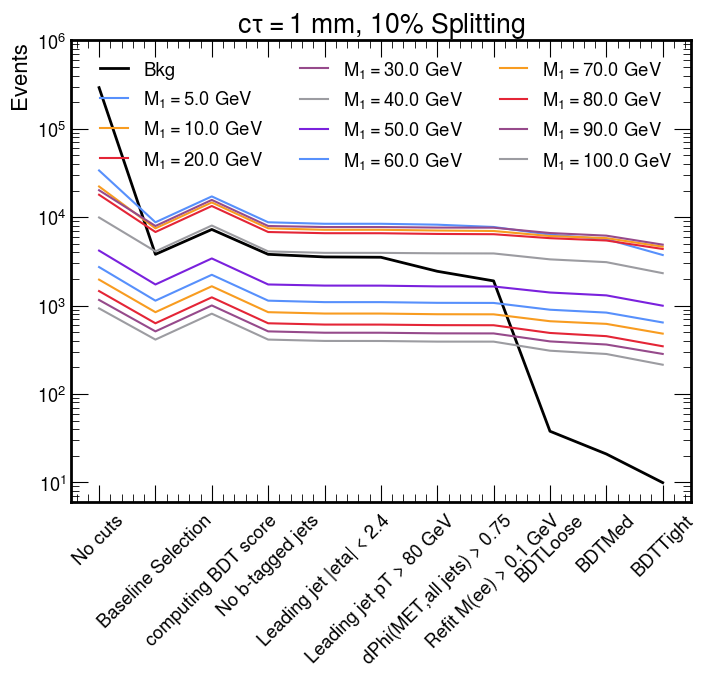

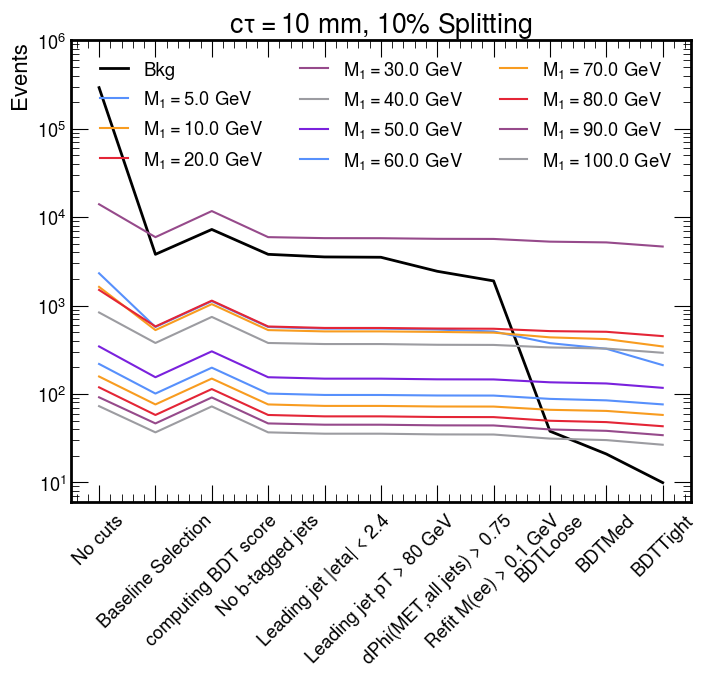

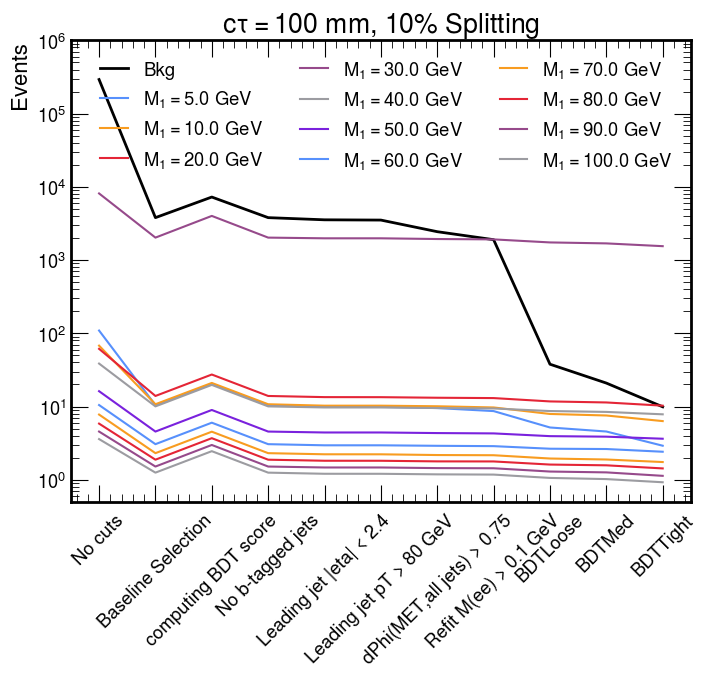

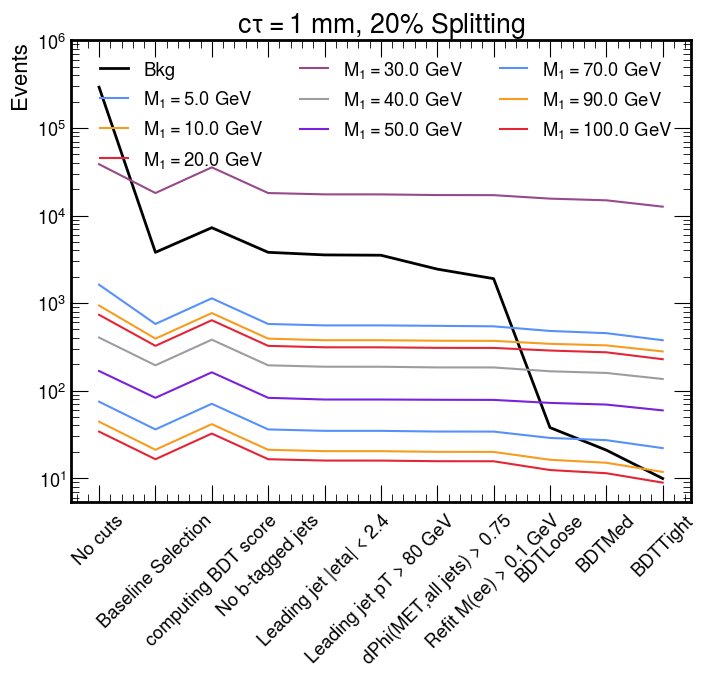

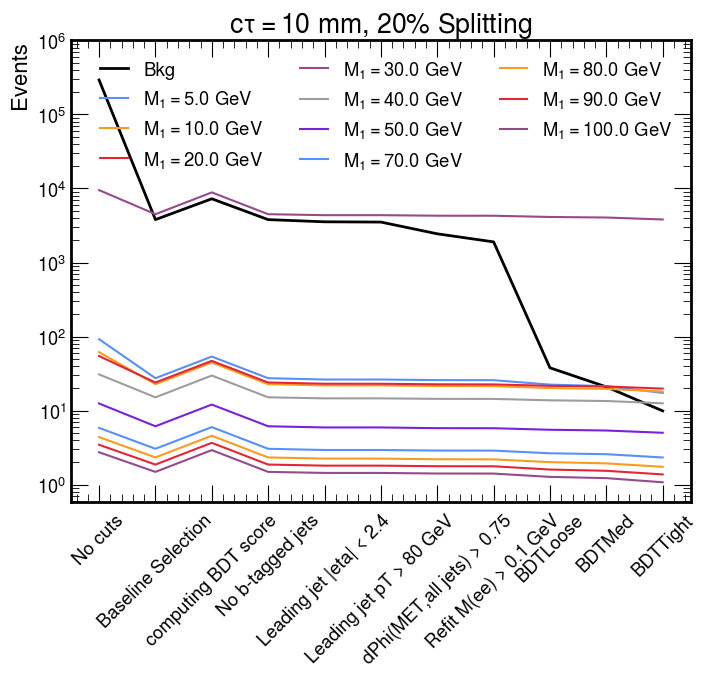

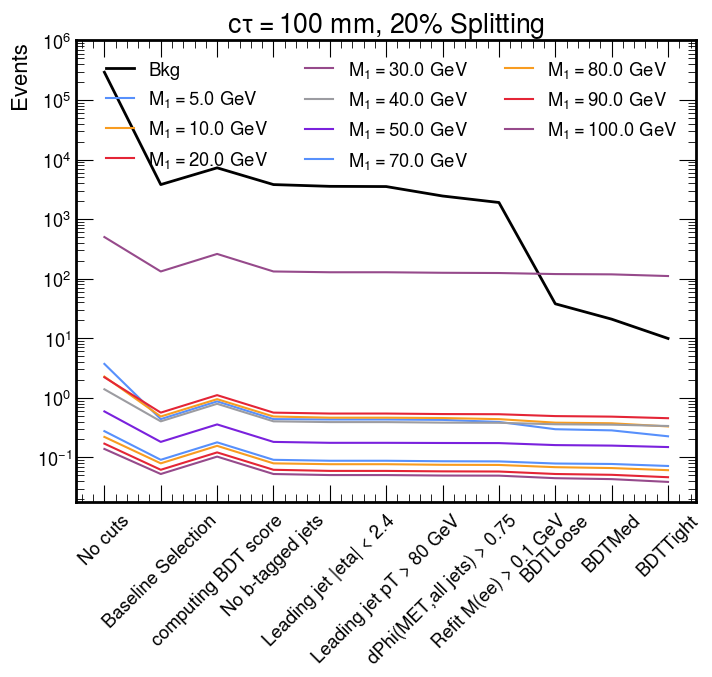

In [11]:
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(8,6))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        plt.plot(np.arange(len(cuts)),bkg_line,lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            plt.plot(np.arange(len(cuts)),sig_cfLines[i],color=f"C{i}",label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=45)
        plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel("Events")
        plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)

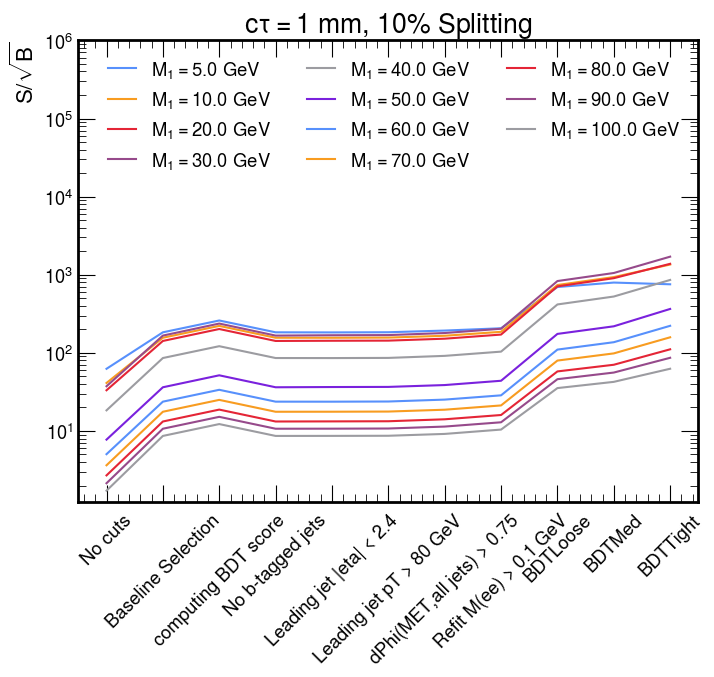

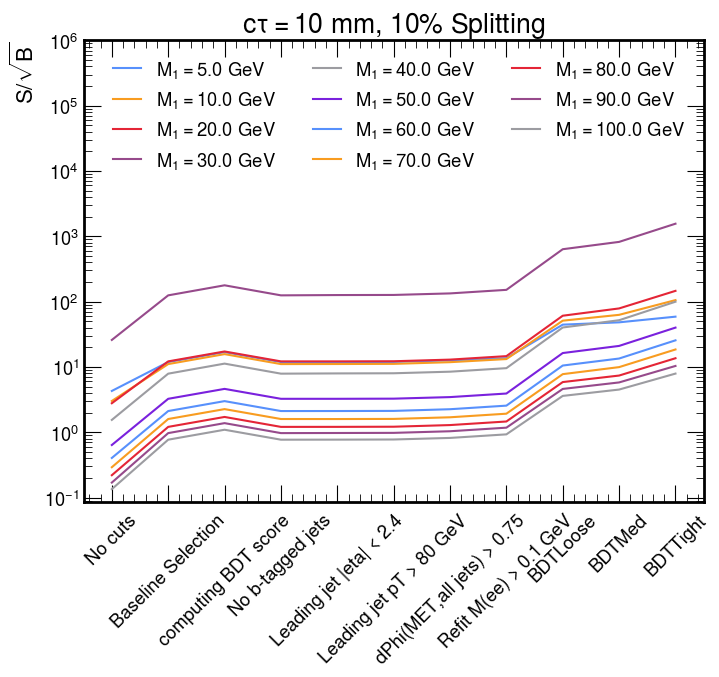

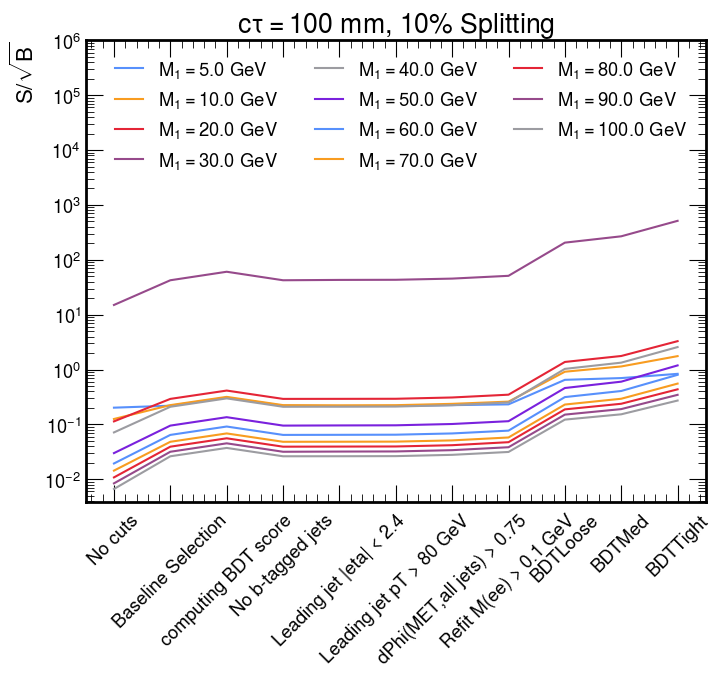

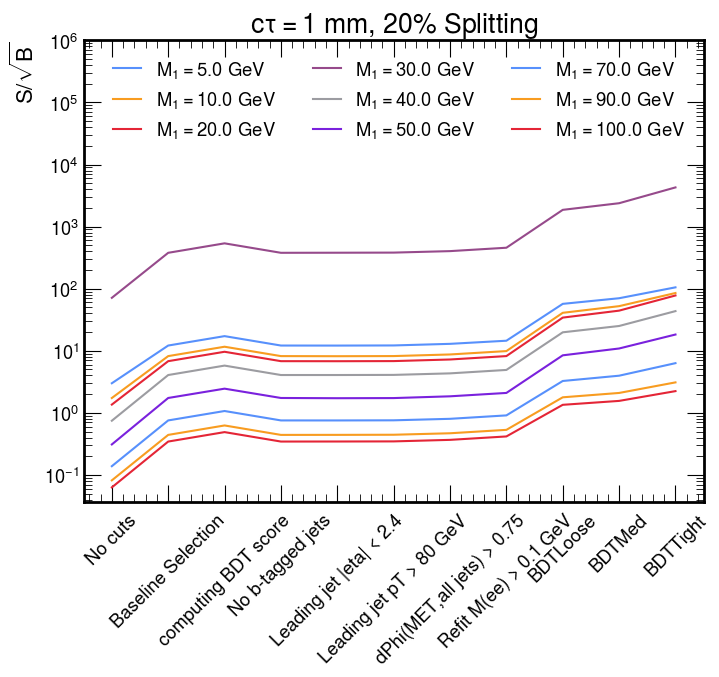

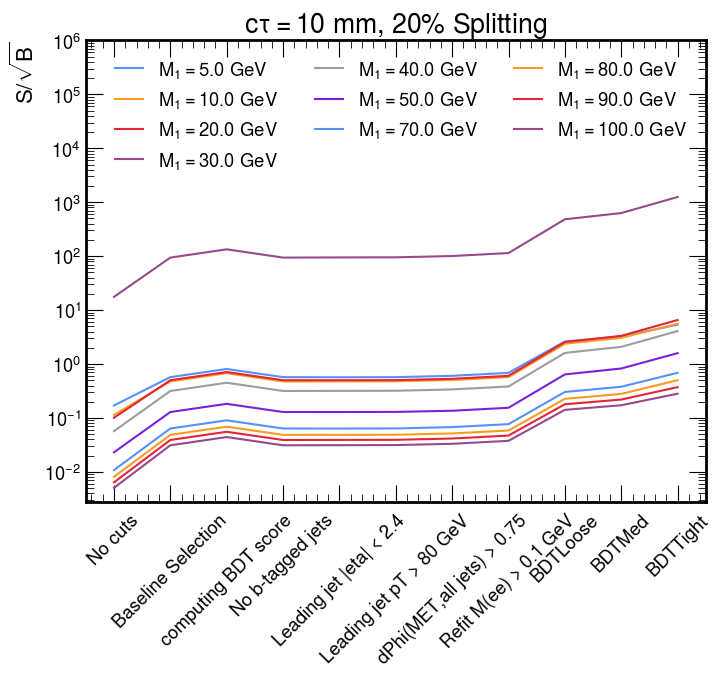

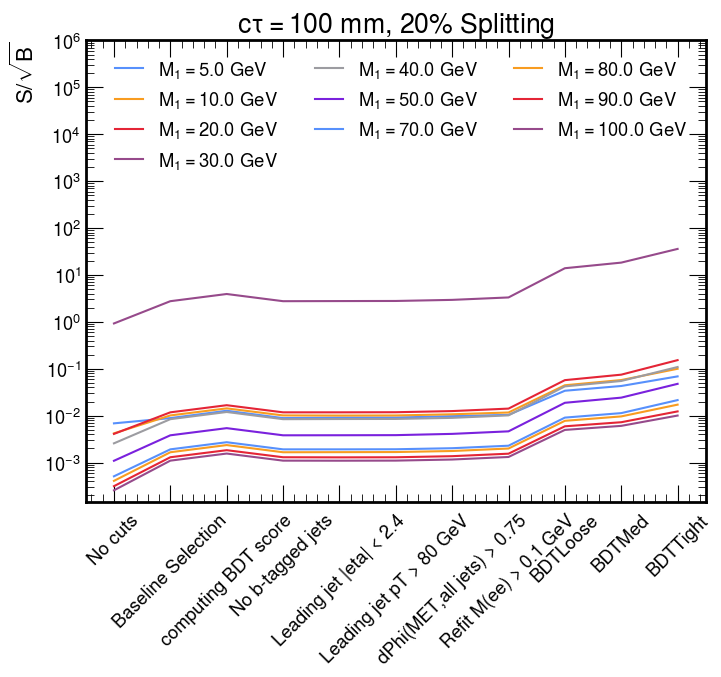

In [6]:
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(8,6))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        for i,m1 in enumerate(m1s):
            plt.plot(np.arange(len(cuts)),np.array(sig_cfLines[i])/np.sqrt(np.array(bkg_line)),color=f"C{i}",label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=45)
        plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel(r"$S/\sqrt{B}$")
        plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)

# Plots

In [13]:
cuts = ['cut4']
cutDesc = hcs.load('cutDesc')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


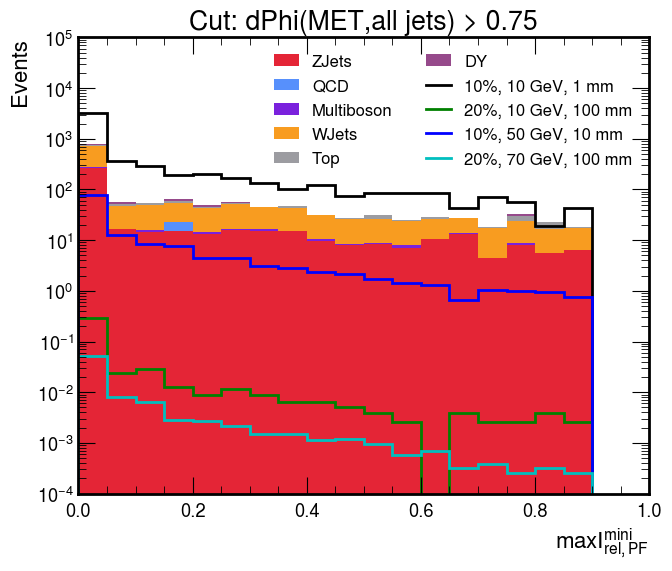

In [14]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$\max I_{rel,PF}^{mini}$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_maxMiniRelIsoCorr",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=[0,1],ylim=[1e-4,1e5],ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


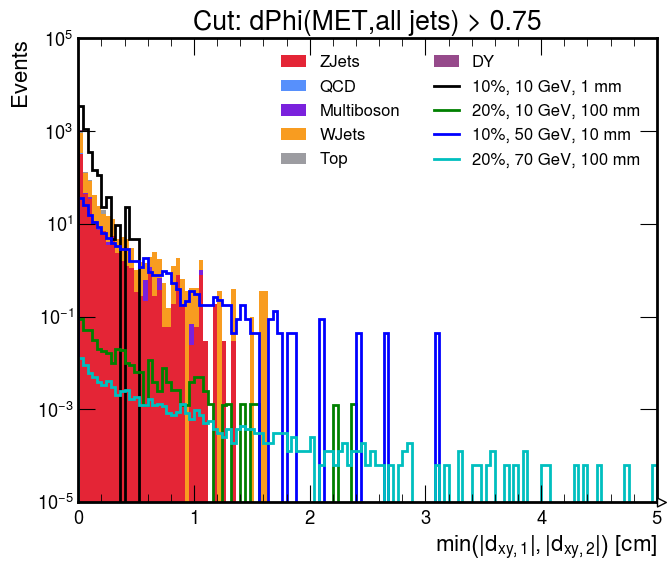

In [15]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_minDxy_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min\left(|d_{xy,1}|,|d_{xy,2}|\right)$ [cm]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_mindxy",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=[0,5],ylim=[1e-5,1e5],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:199: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)


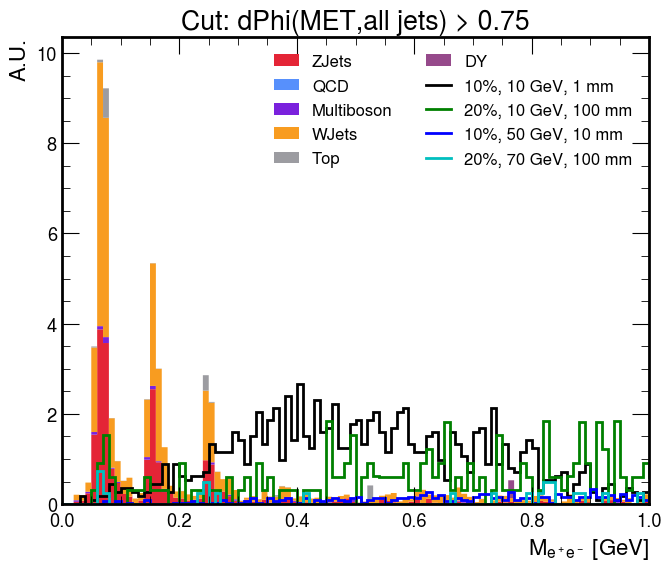

In [16]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_mass_low_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_mass_low",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=[0,1],ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=False,density=True,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


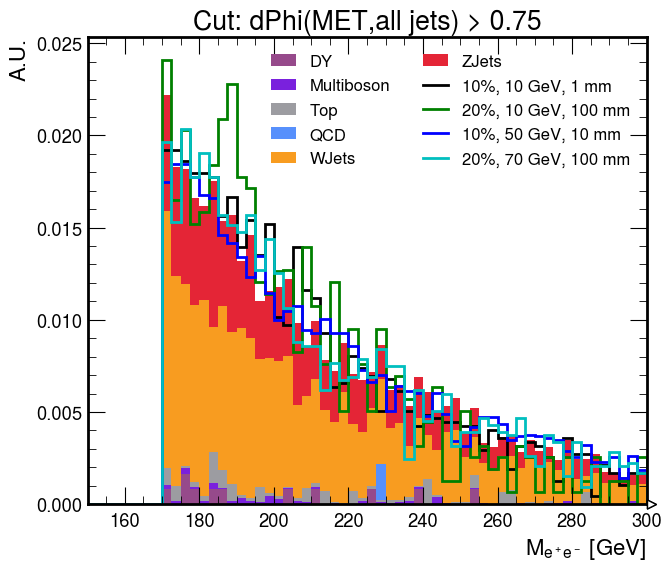

In [17]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "PFMET"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"PFMET",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=[150,300],ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=False,density=True,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


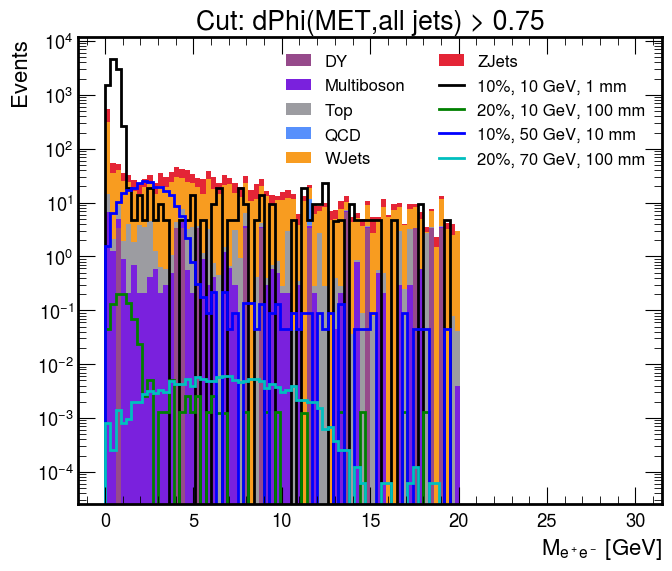

In [21]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_mass_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_mass",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

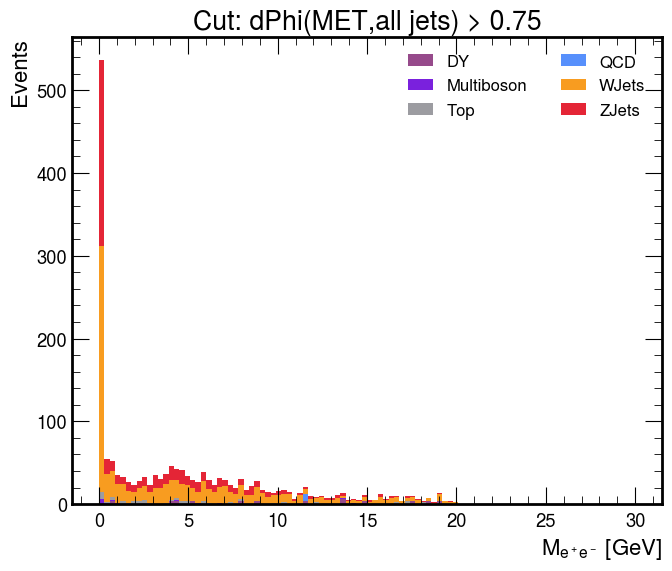

In [26]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_mass_bkgOnly"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_bkgOnly(hcs,hcb,"sel_vtx_mass",selection,outName,outD,
                 figsize=(7,6),ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=False,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


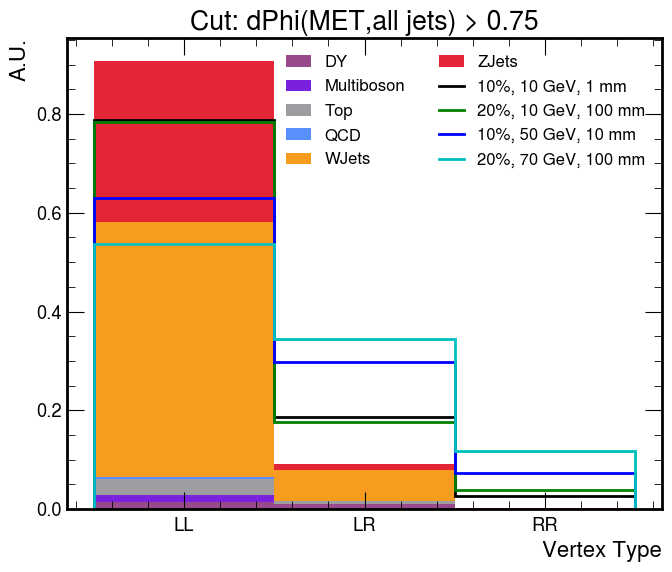

In [29]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_type_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Vertex Type"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_type",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=False,density=True,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


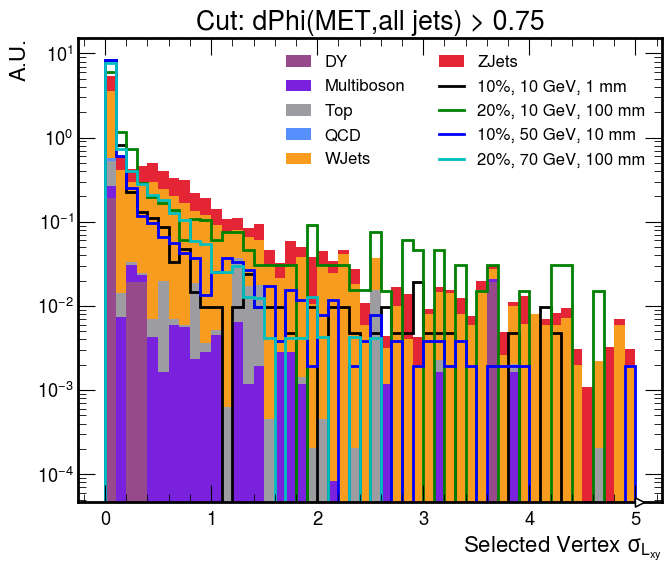

In [30]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_vxyRes_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Selected Vertex $\sigma_{L_{xy}}$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_vxyRes",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=False,show=True,logy=True,density=True,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


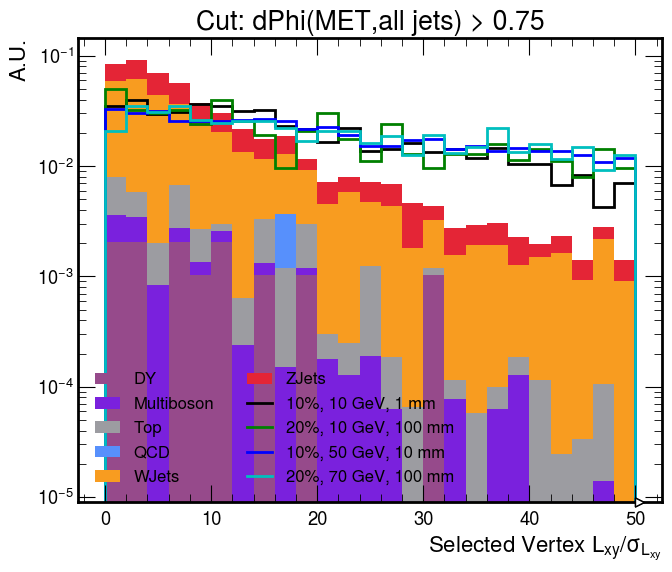

In [32]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_vxySignif_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Selected Vertex $L_{xy}/\sigma_{L_{xy}}$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_vxySignif",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ncol_leg=2,xlabel=xlabel,rebin=20j,
                        save=False,show=True,logy=True,density=True,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


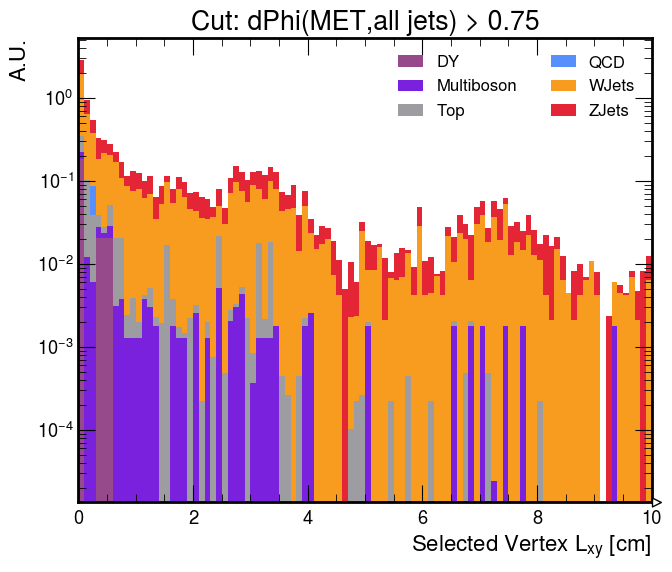

In [33]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_vxy10_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Selected Vertex $L_{xy}$ [cm]"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_bkgOnly(hcs,hcb,"sel_vtx_vxy10",selection,outName,outD,
                 figsize=(7,6),xlim=[0,10],ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=True,title=title,histtype='step',yerr=False)

(0.0, 1.0)

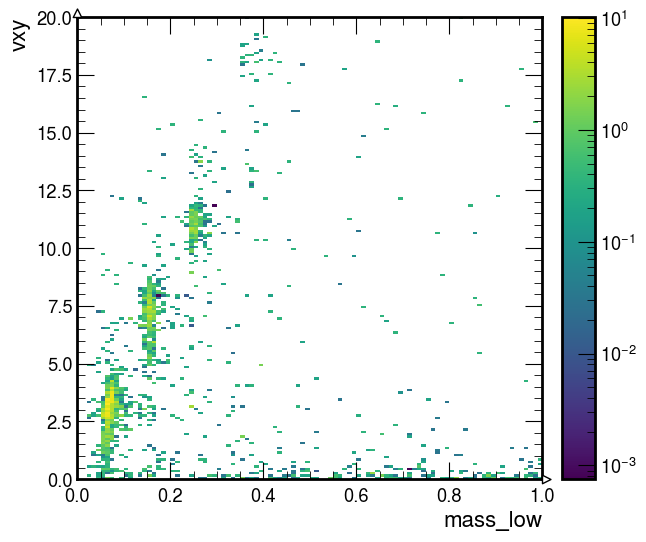

In [34]:
plt.figure(figsize=(6,6))
h = hcb.load("sel_vtx_mass_vs_vxy20")[{"samp":sum,"cut":"cut4"}]
hep.hist2dplot(h,norm=LogNorm())
plt.xlim([0,1])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff59261f250>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff58dccd8e0>, text=[])

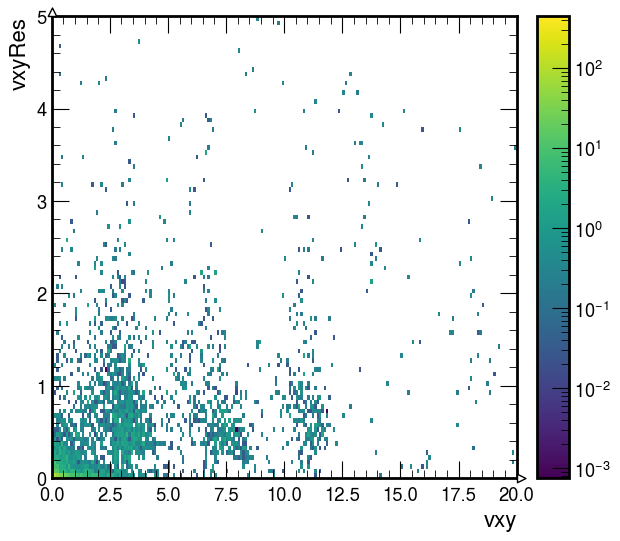

In [35]:
plt.figure(figsize=(6,6))
h = hcb.load("sel_vtx_vxy20_vs_vxyRes")[{"samp":sum,"cut":"cut4"}]
hep.hist2dplot(h,norm=LogNorm())
#plt.xlim([0,1])

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7ff58f63f6a0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7ff58dbe9ac0>, text=[])

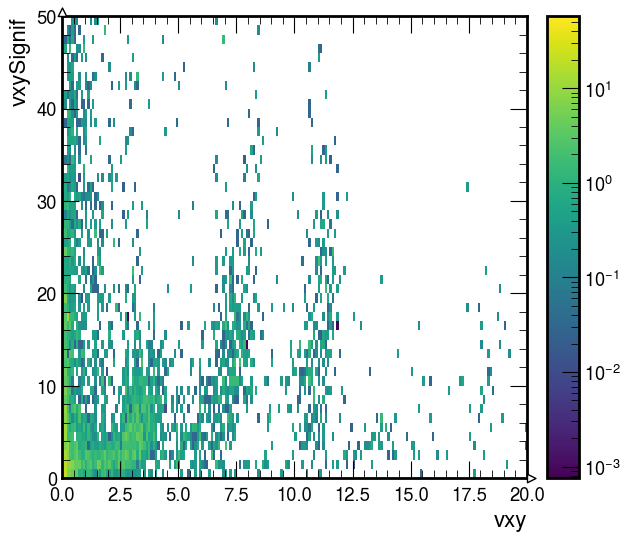

In [36]:
plt.figure(figsize=(6,6))
h = hcb.load("sel_vtx_vxy20_vs_vxySignif")[{"samp":sum,"cut":"cut4"}][:,::10j]
hep.hist2dplot(h,norm=LogNorm())
#plt.xlim([0,1])

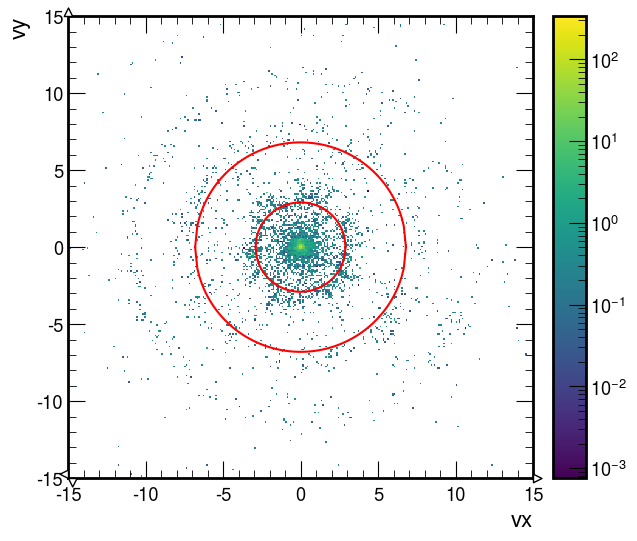

In [37]:
plt.figure(figsize=(6,6))
h = hcb.load("sel_vtx_vx_vs_vy")[{"samp":sum,"cut":"cut0"}][:,::1j]
hep.hist2dplot(h,norm=LogNorm())
#plt.xlim([0,1])

x3 = np.linspace(-2.9,2.9,100)
plt.plot(x3,np.sqrt(2.9**2 - x3**2),color='r')
plt.plot(x3,-np.sqrt(2.9**2 - x3**2),color='r')

x7 = np.linspace(-6.8,6.8,100)
plt.plot(x7,np.sqrt(6.8**2 - x7**2),color='r')
plt.plot(x7,-np.sqrt(6.8**2 - x7**2),color='r')

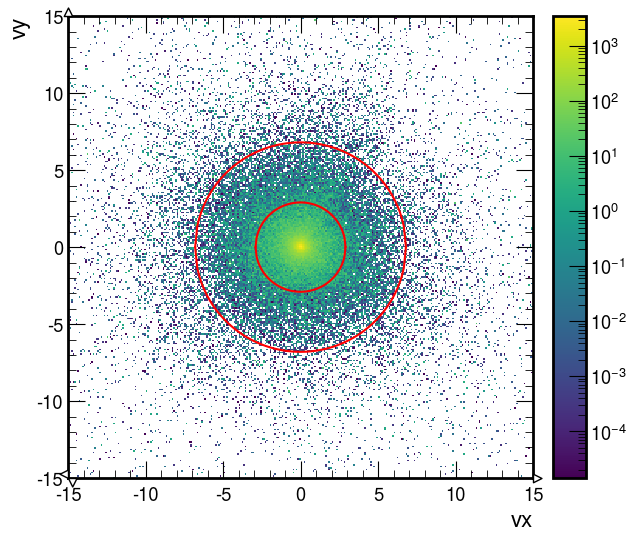

In [38]:
plt.figure(figsize=(6,6))
h = hcs.load("sel_vtx_vx_vs_vy")[{"samp":sum,"cut":"cut0"}][:,::1j]
hep.hist2dplot(h,norm=LogNorm())
#plt.xlim([0,1])

x3 = np.linspace(-2.9,2.9,100)
plt.plot(x3,np.sqrt(2.9**2 - x3**2),color='r')
plt.plot(x3,-np.sqrt(2.9**2 - x3**2),color='r')

x7 = np.linspace(-6.8,6.8,100)
plt.plot(x7,np.sqrt(6.8**2 - x7**2),color='r')
plt.plot(x7,-np.sqrt(6.8**2 - x7**2),color='r')

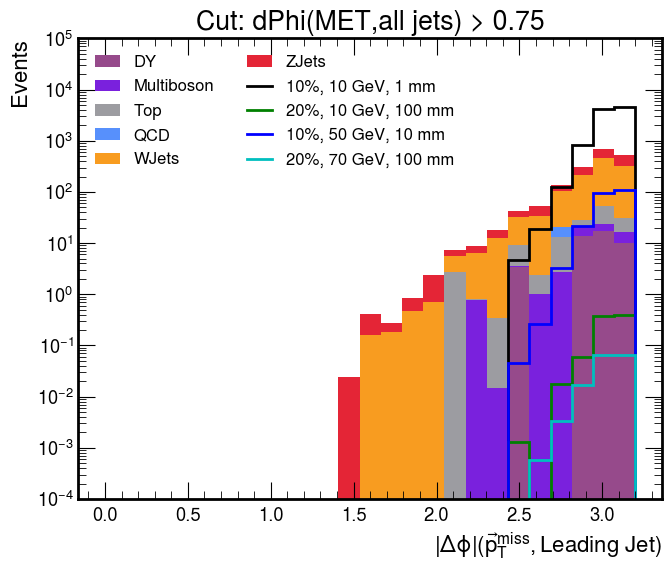

In [39]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "jetMETdPhi_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$|\Delta\phi|(\vec{p}_T^\mathrm{miss},\text{Leading Jet})$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"jetMETdPhi",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ylim=[1e-4,1e5],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


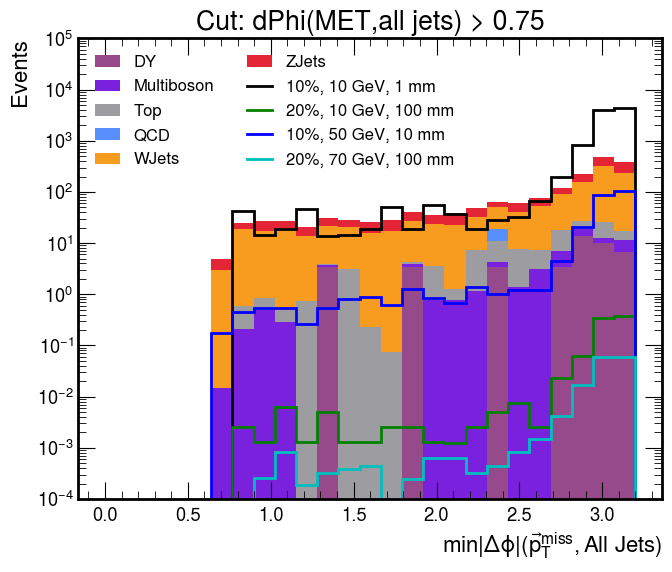

In [41]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "minJetMETdPhi_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$\min |\Delta\phi|(\vec{p}_T^\mathrm{miss},\text{All Jets})$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"minJetMETdPhi",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ylim=[1e-4,1e5],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


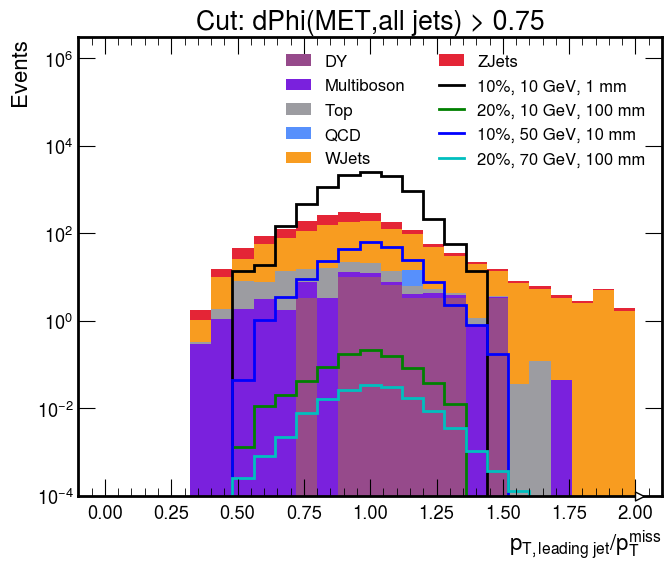

In [40]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "jetMETratio_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$p_{T,\text{leading jet}}/p_T^\mathrm{miss}$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"jetMETratio",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ylim=[1e-4,3e6],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


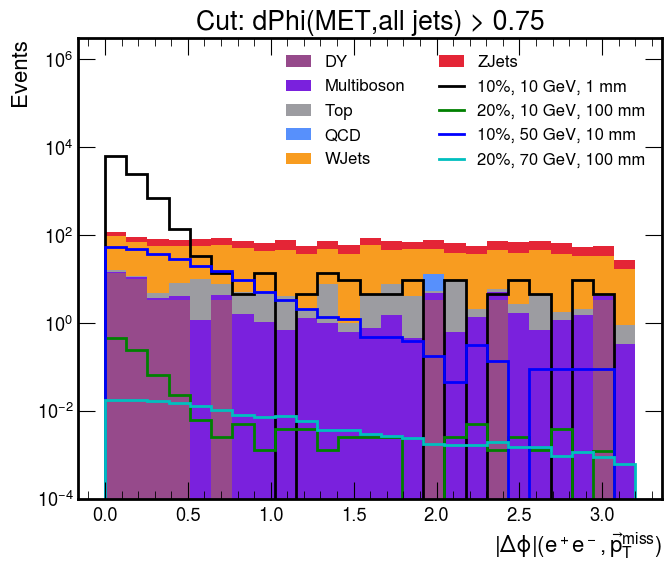

In [43]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_METdPhi_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"$|\Delta\phi|(e^+e^-,\vec{p}_T^\mathrm{miss})$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_METdPhi",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ylim=[1e-4,3e6],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


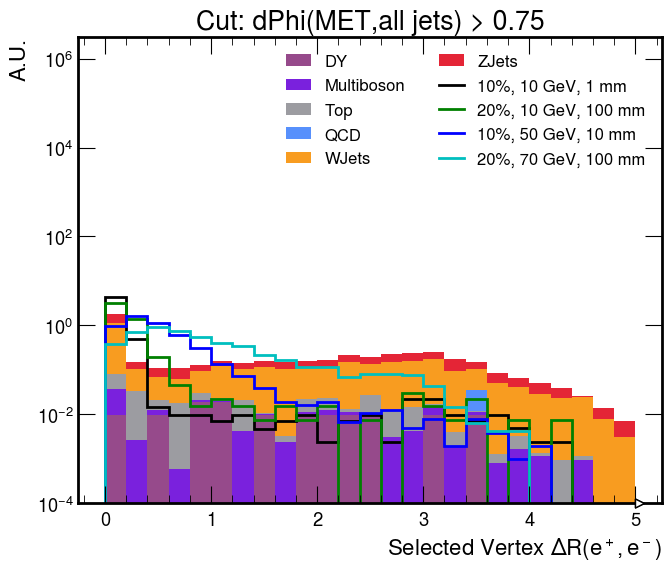

In [45]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_dR_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = r"Selected Vertex $\Delta R(e^+,e^-)$"
    title = f"Cut: {cutDesc[CUT]}"
    plot_samples_sigBkg(hcs,hcb,"sel_vtx_dR",selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),ylim=[1e-4,3e6],ncol_leg=2,xlabel=xlabel,rebin=4j,
                        save=False,show=True,logy=True,density=True,title=title,histtype='step',yerr=False)

# CDFs

In [46]:
cuts = ['cut4']
cutDesc = hcs.load('cutDesc')

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


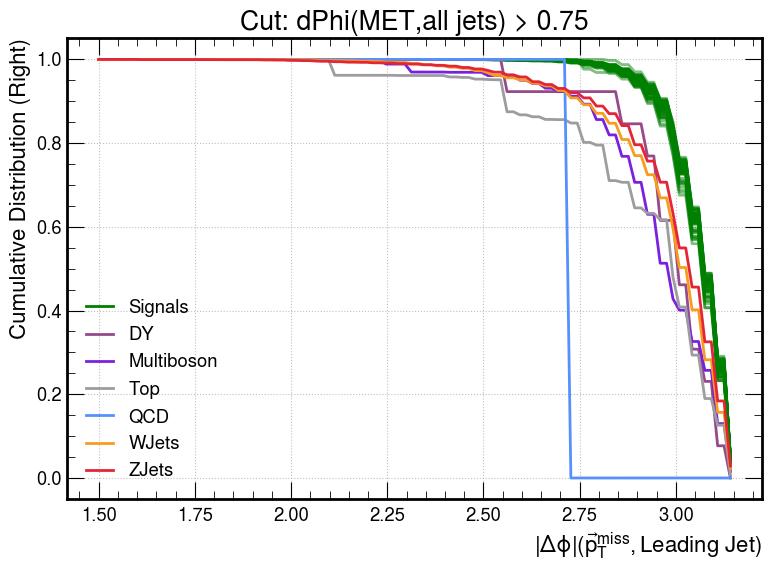

In [47]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"$|\Delta\phi|(\vec{p}_T^\mathrm{miss},\text{Leading Jet})$"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "jetMETdPhi"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "cdf_jetMETdPhi"+f"_{CUT}"
    make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=True,title=title,xlim=[1.5,np.pi])

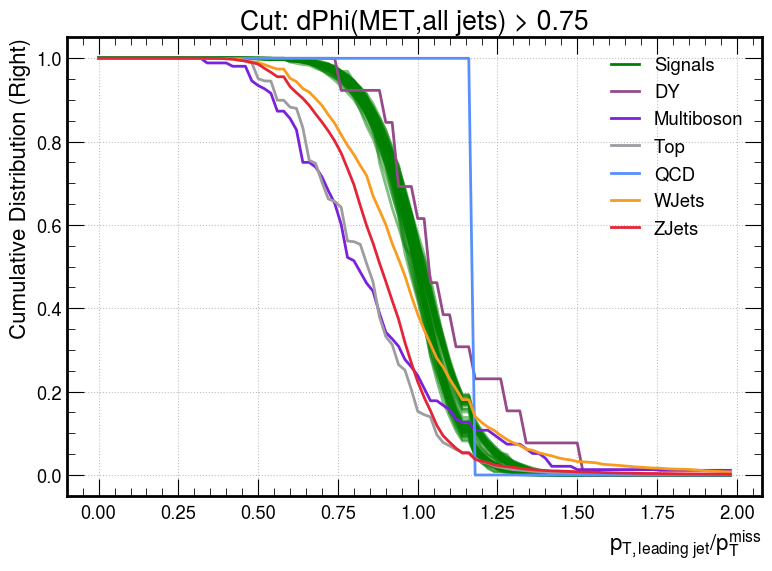

In [49]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"$p_{T,\text{leading jet}}/p_T^\mathrm{miss}$"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "jetMETratio"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "cdf_jetMETratio"+f"_{CUT}"
    make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=True,title=title)

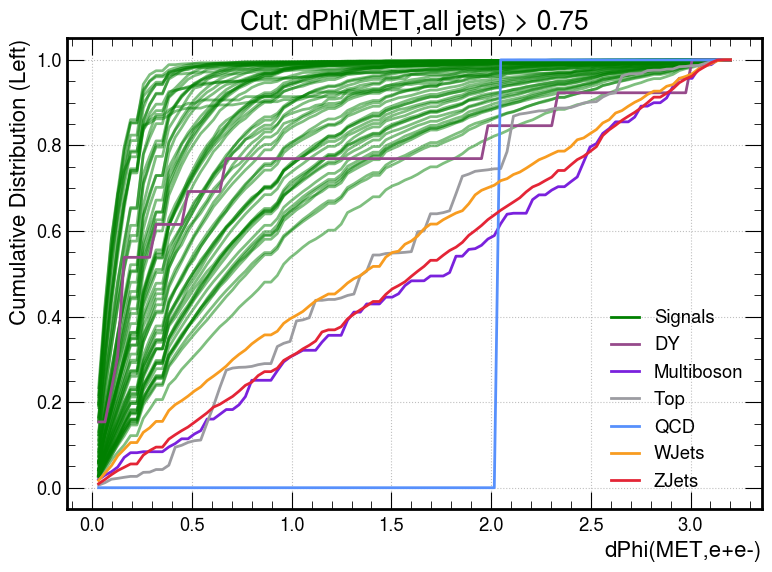

In [53]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"dPhi(MET,e+e-)"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_METdPhi"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "cdf_sel_vtx_METdPhi"+f"_{CUT}"
    make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=False,title=title)

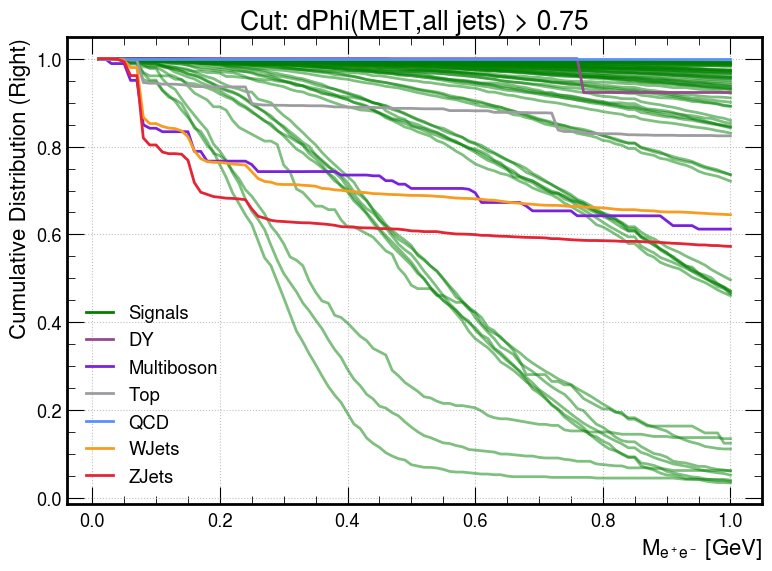

In [55]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_mass_low"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "cdf_sel_vtx_mass_low"+f"_{CUT}"
    make_cdf_summary_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=True,title=title,xlim=[0.01,1])

# N-1

In [56]:
cuts = ['cut4']
cutDesc = hcs.load('cutDesc')

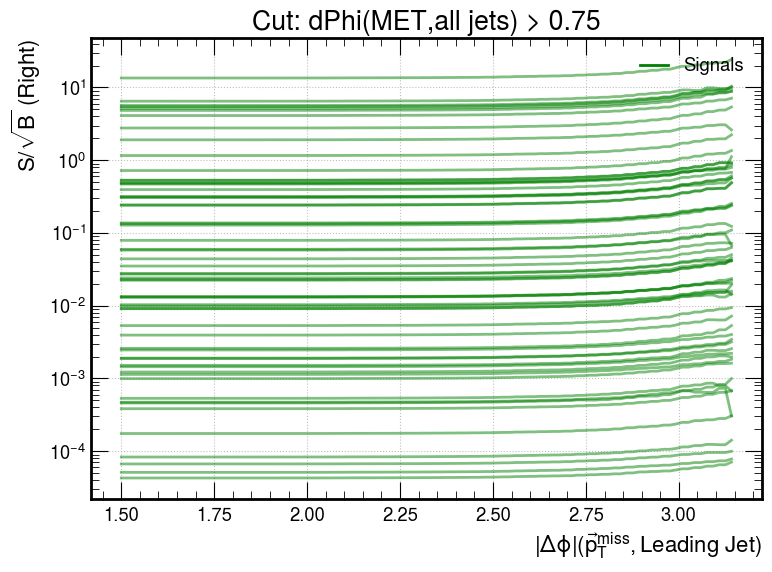

In [57]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"$|\Delta\phi|(\vec{p}_T^\mathrm{miss},\text{Leading Jet})$"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "jetMETdPhi"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "Nminus1_allSigs_jetMETdPhi"+f"_{CUT}"
    make_Nminus1_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=True,title=title,xlim=[1.5,np.pi],logy=True)

/tmp/ipykernel_737/1627874807.py:33: RuntimeWarning: invalid value encountered in divide
  plt.plot(x,sig_yields/tot_bkg,color='green',alpha=0.5,lw=2)
/tmp/ipykernel_737/1627874807.py:33: RuntimeWarning: divide by zero encountered in divide
  plt.plot(x,sig_yields/tot_bkg,color='green',alpha=0.5,lw=2)


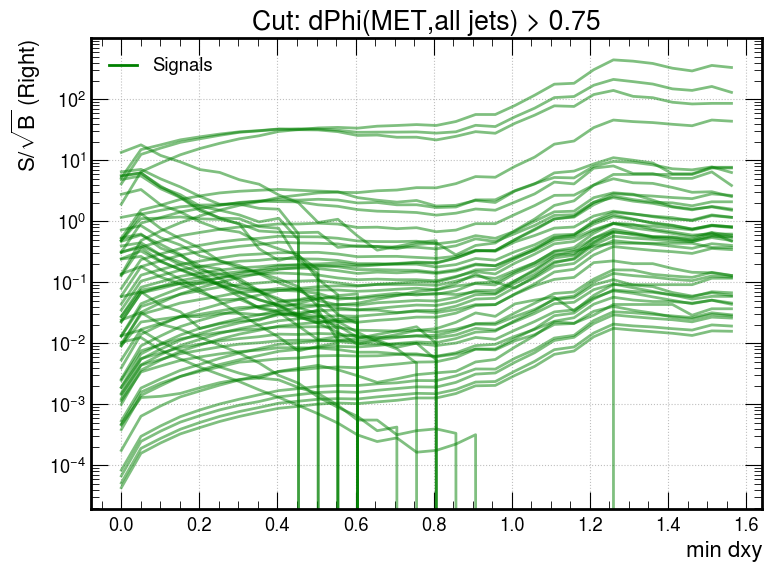

In [59]:
for CUT in cuts:
    selection = {"cut":CUT}
    xlabel = r"min dxy"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_mindxy"
    outD = f"plots_vtxStudy/cdfs/{CUT}/"
    outName = "Nminus1_allSigs_minDxy"+f"_{CUT}"
    make_Nminus1_sigVsBkg(dfs,hcs,hcb,hname,hname,selection,outName,outD,xlabel=xlabel,
                              save=False,show=True,right=True,title=title,logy=True)

# Cutflows

In [60]:
hcs = histContainer("skimmed_signal_histos_cuts.coffea")
hcs170 = histContainer("skimmed_signal_MET170_histos_cuts.coffea")
hcb = histContainer("skimmed_bkg_histos_cuts.coffea",bkg=True)
hcb170 = histContainer("skimmed_bkg_MET170_histos_cuts.coffea",bkg=True)

In [74]:
cfb = hcb.load("cutflow")
cfb170 = hcb170.load("cutflow")
cfs = hcs.load("cutflow")
cfs170 = hcs170.load("cutflow")

In [72]:
samples = list(cfb.keys())
cuts = list(cfb[samples[0]].keys())
for s in samples:
    print(s)
    for c in cuts:
        print(f"\t {c} {cfb[s][c]:.5e} {cfb170[s][c]:.5e} {cfb170[s][c]/cfb[s][c]}")

bkg_2018_QCD_QCD_HT300to500
	 all 1.74785e-08 8.73923e-08 5.0
	 hasVtx 0.00000e+00 0.00000e+00 nan
	 cut0 0.00000e+00 0.00000e+00 nan
	 cut1 0.00000e+00 0.00000e+00 nan
	 cut2 0.00000e+00 0.00000e+00 nan
	 cut3 0.00000e+00 0.00000e+00 nan
	 cut4 0.00000e+00 0.00000e+00 nan
bkg_2018_WJets_WJetsLNu_HT70to100
	 all 2.61360e-06 9.20984e-06 3.523809523809524
	 hasVtx 0.00000e+00 7.77858e-08 inf
	 cut0 0.00000e+00 7.77858e-08 inf
	 cut1 0.00000e+00 4.66715e-08 inf
	 cut2 0.00000e+00 4.66715e-08 inf
	 cut3 0.00000e+00 4.66715e-08 inf
	 cut4 0.00000e+00 4.66715e-08 inf
bkg_2018_QCD_QCD_HT500to700
	 all 1.49434e-06 3.96326e-06 2.6521739130434785
	 hasVtx 1.62429e-08 6.49715e-08 4.0
	 cut0 1.62429e-08 6.49715e-08 4.0
	 cut1 1.62429e-08 6.49715e-08 4.0
	 cut2 1.62429e-08 6.49715e-08 4.0
	 cut3 1.62429e-08 4.87286e-08 3.0
	 cut4 0.00000e+00 0.00000e+00 nan
bkg_2018_Multiboson_WZZ
	 all 2.05829e-03 2.72034e-03 1.3216494443643745
	 hasVtx 1.27317e-05 1.27317e-05 1.0
	 cut0 1.27317e-05 1.27317e-05 1.

/tmp/ipykernel_737/390451183.py:6: RuntimeWarning: invalid value encountered in double_scalars
  print(f"\t {c} {cfb[s][c]:.5e} {cfb170[s][c]:.5e} {cfb170[s][c]/cfb[s][c]}")
/tmp/ipykernel_737/390451183.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"\t {c} {cfb[s][c]:.5e} {cfb170[s][c]:.5e} {cfb170[s][c]/cfb[s][c]}")


In [76]:
samples = list(cfs.keys())
cuts = list(cfs[samples[0]].keys())
cuts = ['all','cut4']
for s in samples:
    print(s)
    for c in cuts:
        print(f"\t {c} {cfs[s][c]:.5e} {cfs170[s][c]:.5e} {cfs170[s][c]/cfs[s][c]}")

sig_2018_Mchi-55p0_dMchi-10p0_ctau-1
	 all 2.82715e-02 4.77382e-02 1.6885603777422924
	 cut4 1.08914e-02 1.79575e-02 1.6487830808686432
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100
	 all 1.89054e-03 3.76382e-03 1.9908741736982356
	 cut4 1.94259e-04 4.36051e-04 2.244684631924648
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10
	 all 4.72336e-03 9.61469e-03 2.035559805384628
	 cut4 1.25254e-03 2.58778e-03 2.066022995948707
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1
	 all 7.79785e-03 1.47867e-02 1.896252778595971
	 cut4 1.44164e-03 2.73406e-03 1.8964909886246526
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10
	 all 3.91450e-03 7.54336e-03 1.927026881640436
	 cut4 7.85644e-04 1.51463e-03 1.927883385370292
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10
	 all 2.08715e-02 3.64888e-02 1.7482576629516813
	 cut4 9.18473e-03 1.64276e-02 1.7885714681971896
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100
	 all 9.81228e-03 1.73310e-02 1.7662555989886435
	 cut4 2.83608e-03 5.39024e-03 1.900597372008788
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1
	 all 5.50527e-0